# Geotail PWI SFA plot -- 2025/7/20

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import sys

# <<< if needed: spacepy install >>>
# !pip install spacepy

In [2]:
# <DATA> 0: CDF  1: ASCII
mode_PWIdata = 0                                        # [PWI data]    0: CDF     1: ASCII

sys.path.append("./lib/")
if mode_PWIdata == 0:
    import gtl_pwi_sfa_cdf_lib as gtl_pwi_sfa
else:
    import gtl_pwi_sfa_asc_lib as gtl_pwi_sfa
import gtl_kprm_fx_lib as gtl_kprm_fx

/opt/homebrew/Caskroom/miniforge/base/envs/3.12s/lib/python3.12/site-packages/spacepy/time.py:2448: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  _read_leaps()


# parameter set -- to be modified

In [3]:
Epoch_min = '2000-01-01 00:00:00';  t_min0 = datetime.datetime.strptime(Epoch_min, "%Y-%m-%d %H:%M:%S")     # Start time
Epoch_max = '2000-01-10 23:59:59';  t_max0 = datetime.datetime.strptime(Epoch_max, "%Y-%m-%d %H:%M:%S")     # End   time

p_min0    = -200.;    p_max0 = -100.                    # [range]       E (dB V2/m2/Hz)
f_min0    = 1562.5;   f_max0 = 800000.                  # [range:       frequency r(Hz)

mode_freq = 0                                           # [frequency]   0: linear   1: log
mode_gap  = 1                                           # [gap]         0: n/a      1: NAN in time gap
mode_stack= 0                                           # [stack]       0: normal   1: Stack plot only
mode_check= 0                                           # [check]       0: plot     1: no plot
mode_plot = 1                                           # [plot]        0: none     1: plot dump

work_dir  = '/Users/user/0-python/GTL_python/ql/'       # Plot dump folder
data_dir  = '/Users/user/D-data/data-Geotail/'          # Data folder

# Data Read

In [4]:
sfa  = gtl_pwi_sfa.read_sfa_multi(Epoch_min, Epoch_max, mode_gap, mode_check, data_dir)
if sfa.num == 0:
    print("!!!!! SFA: NO DATA !!!!!")
else:
    print('[Total]', sfa.num, '     (', sfa.epoch[0], '-', sfa.epoch[-1],  ')')
sfa_med = np.nanmedian(sfa.sfae_high, axis=0)

[Total] 9 days      ( 2000-01-01 - 2000-01-10 )
0 2000-01-01  10758
1 2000-01-02  21543
2 2000-01-03  31473
3 2000-01-04  42258
4 2000-01-05  53023
5 2000-01-06  63772
6 2000-01-07  71249
7 2000-01-08  82025
8 2000-01-09  92801
9 2000-01-10  103585
[freq_e]  1575.0 795363.0 (384,) float32
[freq_b]  1575.0 12427.547 (128,) float32
[sfae_high]  -144.03 -182.57 (103585, 384) float32
[sfab_high]  -93.21 -85.68 (103585, 128) float32
[antstat]  10.0 10.0 (103585,) float32
[e_ampstat]  11111.0 11111.0 (103585,) float32
[epoch]  2000-01-01 00:00:05.017555 2000-01-10 23:59:47.392022 (103585,) object
[Total] 103585      ( 2000-01-01 00:00:05.017555 - 2000-01-10 23:59:47.392022 )


In [5]:
orbit  = gtl_kprm_fx.read_orbit_multi(Epoch_min, Epoch_max, mode_gap, mode_check, data_dir)
if orbit.num == 0:
    print("!!!!! ORBIT: NO DATA !!!!!")
else:
    print('[Total]', orbit.num, '     (', orbit.epoch[0], '-', orbit.epoch[-1],  ')')

[Total] 9 days      ( 2000-01-01 - 2000-01-10 )
0 2000-01-01  28235
1 2000-01-02  56536
2 2000-01-03  82581
3 2000-01-04  110864
4 2000-01-05  139111
5 2000-01-06  167305
6 2000-01-07  186898
7 2000-01-08  215165
8 2000-01-09  243430
9 2000-01-10  271716
[orbit_SM]  [-17.33 -24.99   1.31] [-24.8  -17.29   4.03] (271716, 3) float64
[R]  30.439203340429263 30.49959016118086 (271716,) float64
[MLAT]  2.4665776979736935 7.592863216433616 (271716,) float64
[MLT]  3.6839711039512975 2.325555865614872 (271716,) float64
[tilt]  -25.86 -24.54 (271716,) float64
[epoch]  2000-01-01 00:00:07.144000 2000-01-10 23:59:49.593000 (271716,) object
[Total] 271716      ( 2000-01-01 00:00:07.144000 - 2000-01-10 23:59:49.593000 )


In [6]:
# Data check
SFA_E  = sfa.sfae_high.transpose()
n0 = 0;  n1 = sfa.num//2;   n2 = sfa.num-1
print(' [Start]', sfa.epoch[n0],  f'  E[dB V2/m2/Hz]  Band-3 ({sfa.sfae_high[n0][0]:.1f} - {sfa.sfae_high[n0][127]:.1f})', f'  Band-4 ({sfa.sfae_high[n0][128]:.1f} - {sfa.sfae_high[n0][255]:.1f})', f'  Band-5 ({sfa.sfae_high[n0][256]:.1f} - {sfa.sfae_high[n0][383]:.1f})')
print('   [Mid]', sfa.epoch[n1],  f'  E[dB V2/m2/Hz]  Band-3 ({sfa.sfae_high[n1][0]:.1f} - {sfa.sfae_high[n1][127]:.1f})', f'  Band-4 ({sfa.sfae_high[n1][128]:.1f} - {sfa.sfae_high[n1][255]:.1f})', f'  Band-5 ({sfa.sfae_high[n1][256]:.1f} - {sfa.sfae_high[n1][383]:.1f})')
print('   [End]', sfa.epoch[n2],  f'  E[dB V2/m2/Hz]  Band-3 ({sfa.sfae_high[n2][0]:.1f} - {sfa.sfae_high[n2][127]:.1f})', f'  Band-4 ({sfa.sfae_high[n2][128]:.1f} - {sfa.sfae_high[n2][255]:.1f})', f'  Band-5 ({sfa.sfae_high[n2][256]:.1f} - {sfa.sfae_high[n2][383]:.1f})')

 [Start] 2000-01-01 00:00:05.017555   E[dB V2/m2/Hz]  Band-3 (-144.0 - -160.4)   Band-4 (-135.1 - -192.8)   Band-5 (-193.9 - -177.4)
   [Mid] 2000-01-05 21:15:24.160025   E[dB V2/m2/Hz]  Band-3 (-153.8 - -153.8)   Band-4 (-147.9 - -150.5)   Band-5 (-146.1 - -171.8)
   [End] 2000-01-10 23:59:47.392022   E[dB V2/m2/Hz]  Band-3 (-162.7 - -147.7)   Band-4 (-146.3 - -198.3)   Band-5 (-218.9 - -182.6)


In [7]:
# Data check
orbit_SM  = orbit.orbit_SM.transpose()
m0 = 0;  m1 = orbit.num//2;   m2 = orbit.num-1
print(' [Start]', orbit.epoch[m0],  f'  SM[Re] ({orbit.orbit_SM[m0][0]:+6.1f}, {orbit.orbit_SM[m0][1]:+6.1f}, {orbit.orbit_SM[m0][2]:+6.1f})', f'   R[Re] {orbit.R[m0]:5.1f}', f'   MLAT[deg] {orbit.MLAT[m0]:+5.1f}', f'   MLT[h] {orbit.R[m0]:4.1f}', f'   Tilt[deg] {orbit.tilt[m0]:4.1f}')
print('   [Mid]', orbit.epoch[m1],  f'  SM[Re] ({orbit.orbit_SM[m1][0]:+6.1f}, {orbit.orbit_SM[m1][1]:+6.1f}, {orbit.orbit_SM[m1][2]:+6.1f})', f'   R[Re] {orbit.R[m1]:5.1f}', f'   MLAT[deg] {orbit.MLAT[m1]:+5.1f}', f'   MLT[h] {orbit.R[m1]:4.1f}', f'   Tilt[deg] {orbit.tilt[m1]:4.1f}')
print('   [End]', orbit.epoch[m2],  f'  SM[Re] ({orbit.orbit_SM[m2][0]:+6.1f}, {orbit.orbit_SM[m2][1]:+6.1f}, {orbit.orbit_SM[m2][2]:+6.1f})', f'   R[Re] {orbit.R[m2]:5.1f}', f'   MLAT[deg] {orbit.MLAT[m2]:+5.1f}', f'   MLT[h] {orbit.R[m2]:4.1f}', f'   Tilt[deg] {orbit.tilt[m2]:4.1f}')

 [Start] 2000-01-01 00:00:07.144000   SM[Re] ( -17.3,  -25.0,   +1.3)    R[Re]  30.4    MLAT[deg]  +2.5    MLT[h] 30.4    Tilt[deg] -25.9
   [Mid] 2000-01-05 21:14:09.826000   SM[Re] ( -22.6,  -20.5,   +0.7)    R[Re]  30.5    MLAT[deg]  +1.3    MLT[h] 30.5    Tilt[deg] -18.0
   [End] 2000-01-10 23:59:49.593000   SM[Re] ( -24.8,  -17.3,   +4.0)    R[Re]  30.5    MLAT[deg]  +7.6    MLT[h] 30.5    Tilt[deg] -24.5


# Plot

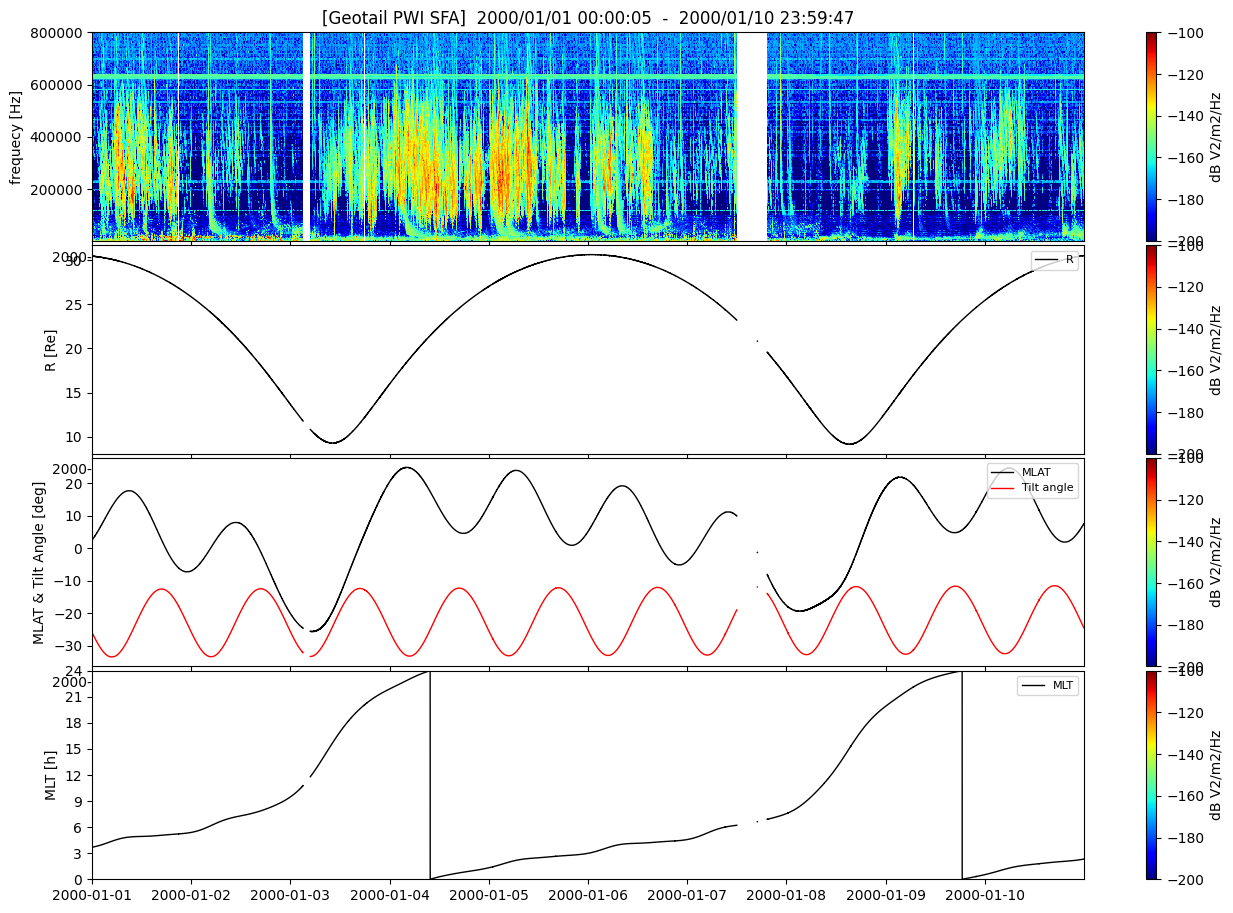

/Users/user/0-python/GTL_python/ql/GTL-PWI-SFA-ORB_200001010000-200001102359.png


In [8]:
# FT diagram + Orbit
if mode_check==0:
    n0 = 0;  n2 = sfa.num-1
    p_min = p_min0;  p_max = p_max0
    f_min = f_min0;  f_max = f_max0
    date1 = sfa.epoch[n0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
    date3 = sfa.epoch[n2];  date3 = date3.strftime('%Y/%m/%d %R:%S')

    fig2d = plt.figure(figsize=[16, 11])
    ax1   = fig2d.add_subplot(4, 1, 1);  ax2 = fig2d.add_subplot(4, 1, 2);  ax3 = fig2d.add_subplot(4, 1, 3);  ax4 = fig2d.add_subplot(4, 1, 4)
    p1    = ax1.pcolormesh(sfa.epoch, sfa.freq_e, SFA_E, vmin=p_min, vmax=p_max, cmap='jet')
    pp1   = fig2d.colorbar(p1, ax=ax1, orientation="vertical");  pp1.set_label('dB V2/m2/Hz')
    p2    = ax2.plot(orbit.epoch, orbit.R,    '-k', linewidth=1, label='R')
    p3    = ax3.plot(orbit.epoch, orbit.MLAT, '-k', linewidth=1, label='MLAT')
    p3    = ax3.plot(orbit.epoch, orbit.tilt, '-r', linewidth=1, label='Tilt angle')
    p4    = ax4.plot(orbit.epoch, orbit.MLT,  '-k', linewidth=1, label='MLT')
    pp1   = fig2d.colorbar(p1, ax=ax2, orientation="vertical");  pp1.set_label('dB V2/m2/Hz')
    pp1   = fig2d.colorbar(p1, ax=ax3, orientation="vertical");  pp1.set_label('dB V2/m2/Hz')
    pp1   = fig2d.colorbar(p1, ax=ax4, orientation="vertical");  pp1.set_label('dB V2/m2/Hz')
    ax2.legend(loc='upper right', fontsize=8);  ax3.legend(loc='upper right', fontsize=8);  ax4.legend(loc='upper right', fontsize=8)

    # X-axis
    if t_min0 == 0:
        E_min = '2000-08-19 02:55:00';  t_min = datetime.datetime.strptime(E_min, "%Y-%m-%d %H:%M:%S");  
        E_max = '2000-08-19 02:57:00';  t_max = datetime.datetime.strptime(E_max, "%Y-%m-%d %H:%M:%S");  xlim=[t_min, t_max]
        xlim=[sfa.epoch[0], sfa.epoch[-1]]
    else:
        xlim=[t_min0, t_max0]
    ax1.set_xlim(xlim);  ax2.set_xlim(xlim);  ax3.set_xlim(xlim);  ax3.set_xlim(xlim);  ax4.set_xlim(xlim)
    title_date = "[Geotail PWI SFA]  " + date1 + "  -  " + date3;  ax1.set_title(title_date)

    # Y-axis
    ax1.set_ylabel('frequecy [Hz]');  ax2.set_ylabel('R [Re]');  ax3.set_ylabel('MLAT & Tilt Angle [deg]');  ax4.set_ylabel('MLT [h]')
    ax1.set_ylim(f_min, f_max);  
    if mode_freq == 1:
        ax1.set_yscale('log')
    ylim=[0, 24];  ax4.set_ylim(ylim);  ax4.set_yticks([0,3,6,9,12,15,18,21,24])

    plt.subplots_adjust(hspace=0.02);  plt.show()
    if mode_plot == 1:
        png_filename = work_dir + 'GTL-PWI-SFA-ORB_' + xlim[0].strftime('%Y%m%d%H%M-') + xlim[1].strftime('%Y%m%d%H%M') + '.png'
        fig2d.savefig(png_filename);  print(png_filename)

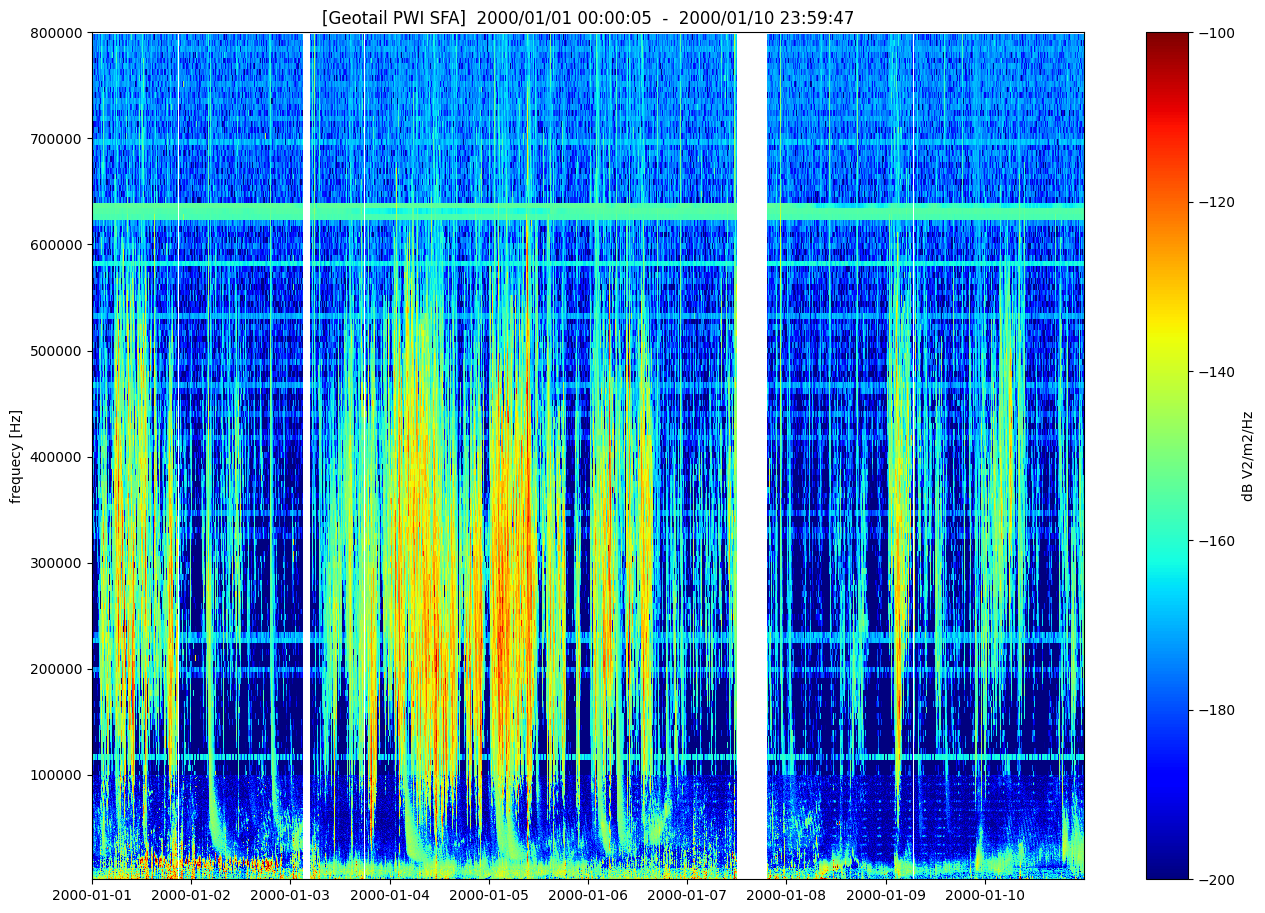

/Users/user/0-python/GTL_python/ql/GTL-PWI-SFA-ft_200001010000-200001102359.png


<Figure size 640x480 with 0 Axes>

In [9]:
# FT diagram
if mode_stack==0 and mode_check==0:
    n0 = 0;  n2 = sfa.num-1
    p_min = p_min0;  p_max = p_max0
    f_min = f_min0;  f_max = f_max0
    date1 = sfa.epoch[n0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
    date3 = sfa.epoch[n2];  date3 = date3.strftime('%Y/%m/%d %R:%S')

    fig2d = plt.figure(figsize=[16, 11])
    ax1   = fig2d.add_subplot(1, 1, 1)
    p1    = ax1.pcolormesh(sfa.epoch, sfa.freq_e, SFA_E, vmin=p_min, vmax=p_max, cmap='jet')
    pp1   = fig2d.colorbar(p1, ax=ax1, orientation="vertical");  pp1.set_label('dB V2/m2/Hz')

    # X-axis
    if t_min0 == 0:
        E_min = '2000-08-19 02:55:00';  t_min = datetime.datetime.strptime(E_min, "%Y-%m-%d %H:%M:%S");  
        E_max = '2000-08-19 02:57:00';  t_max = datetime.datetime.strptime(E_max, "%Y-%m-%d %H:%M:%S");  xlim=[t_min, t_max]
        xlim=[sfa.epoch[0], sfa.epoch[-1]]
    else:
        xlim=[t_min0, t_max0]
    ax1.set_xlim(xlim)
    title_date = "[Geotail PWI SFA]  " + date1 + "  -  " + date3;  ax1.set_title(title_date)

    # Y-axis
    ax1.set_ylabel('frequecy [Hz]');  ax1.set_ylim(f_min, f_max);  
    if mode_freq == 1:
        ax1.set_yscale('log')

    plt.subplots_adjust(hspace=0.02);  plt.show()
    if mode_plot == 1:
        png_filename = work_dir + 'GTL-PWI-SFA-ft_' + xlim[0].strftime('%Y%m%d%H%M-') + xlim[1].strftime('%Y%m%d%H%M') + '.png'
        fig2d.savefig(png_filename);  print(png_filename)
        plt.subplots_adjust(hspace=0.02);  plt.show()

/Users/user/0-python/GTL_python/ql/GTL-PWI-SFA-spec_200001010000-200001102359.png


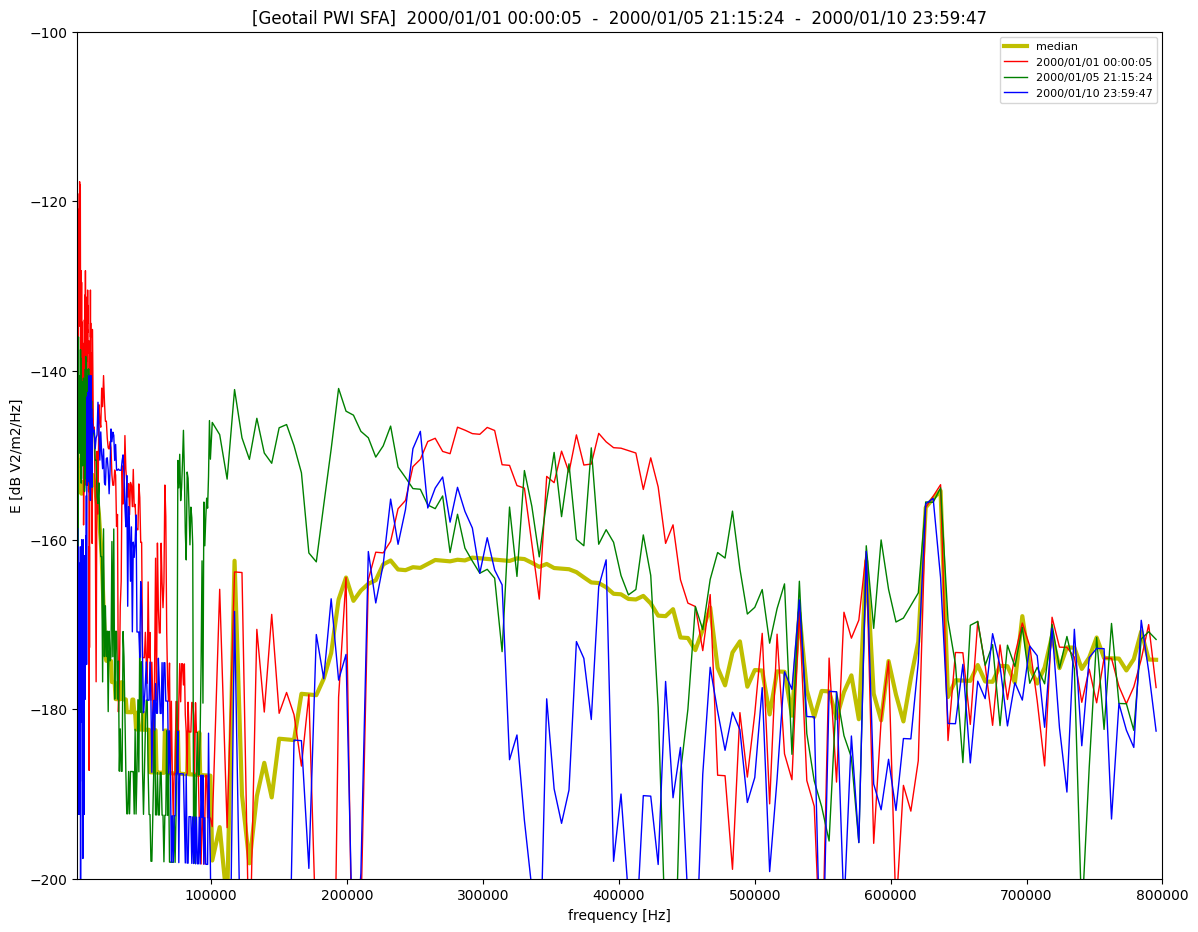

In [10]:
# Spectrum
if mode_stack==0 and mode_check==0:
    n0 = 0;  n1 = sfa.num//2;   n2 = sfa.num-1
    p_min = p_min0;  p_max = p_max0
    f_min = f_min0;  f_max = f_max0
    date1 = sfa.epoch[n0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
    date2 = sfa.epoch[n1];  date2 = date2.strftime('%Y/%m/%d %R:%S')
    date3 = sfa.epoch[n2];  date3 = date3.strftime('%Y/%m/%d %R:%S')

    fig = plt.figure(figsize=(14, 11));  ax1 = fig.add_subplot(1, 1, 1)
    ax1.plot(sfa.freq_e, sfa_med,   '-y',  linewidth=3.0, label='median')
    ax1.plot(sfa.freq_e, sfa.sfae_high[n0], '-r',  linewidth=1.0, label=date1)
    ax1.plot(sfa.freq_e, sfa.sfae_high[n1], '-g',  linewidth=1.0, label=date2)
    ax1.plot(sfa.freq_e, sfa.sfae_high[n2], '-b',  linewidth=1.0, label=date3)
    ax1.legend(loc='upper right', fontsize=8)

    # X-axis
    ax1.set_xlabel('frequency [Hz]')
    xlim=[f_min, f_max];  ax1.set_xlim(xlim)
    title_date = "[Geotail PWI SFA]  " + date1 + "  -  " + date2 + "  -  " + date3;  ax1.set_title(title_date)

    # Y-axis
    ax1.set_ylabel('E [dB V2/m2/Hz]');   
    ylim=[p_min, p_max];  ax1.set_ylim(ylim)
    if mode_freq == 1:
        ax1.set_xscale('log')

    fig.subplots_adjust(hspace=0.1);  fig.show
    if mode_plot == 1:
        png_filename = work_dir + 'GTL-PWI-SFA-spec_' + sfa.epoch[n0].strftime('%Y%m%d%H%M-') + sfa.epoch[n2].strftime('%Y%m%d%H%M') + '.png'
        fig.savefig(png_filename);  print(png_filename)

/Users/user/0-python/GTL_python/ql/GTL-ORB_200001010000-200001102359.png


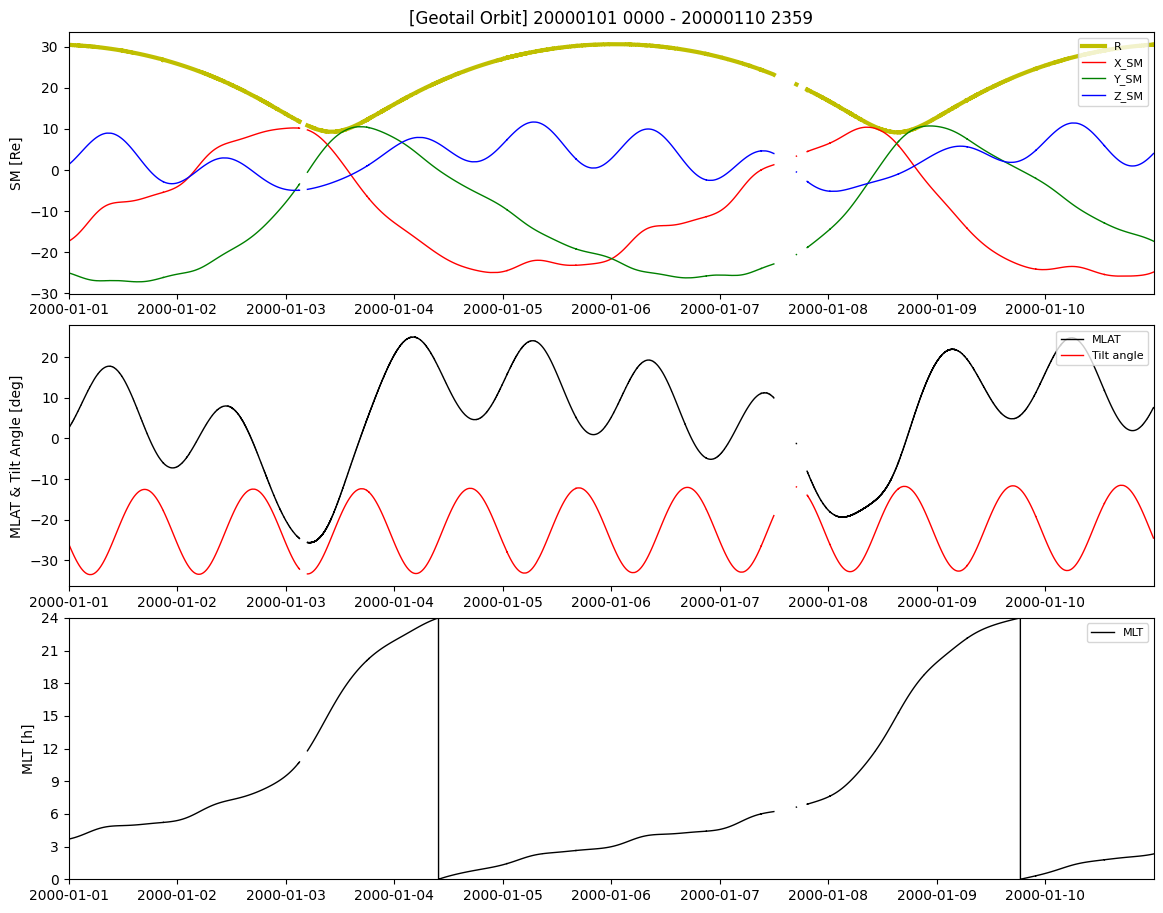

In [11]:
# Orbit
if mode_stack==0 and mode_check==0:
    fig = plt.figure(figsize=(14, 11))
    ax1 = fig.add_subplot(3, 1, 1);  ax2 = fig.add_subplot(3, 1, 2);  ax3 = fig.add_subplot(3, 1, 3)
    ax1.plot(orbit.epoch, orbit.R,           '-y', linewidth=3, label='R')
    ax1.plot(orbit.epoch, orbit_SM[0], '-r', linewidth=1, label='X_SM')
    ax1.plot(orbit.epoch, orbit_SM[1], '-g', linewidth=1, label='Y_SM')
    ax1.plot(orbit.epoch, orbit_SM[2], '-b', linewidth=1, label='Z_SM')
    ax2.plot(orbit.epoch, orbit.MLAT,        '-k', linewidth=1, label='MLAT')
    ax2.plot(orbit.epoch, orbit.tilt,        '-r', linewidth=1, label='Tilt angle')
    ax3.plot(orbit.epoch, orbit.MLT,         '-k', linewidth=1, label='MLT')
    ax1.set_ylabel('SM [Re]');  ax2.set_ylabel('MLAT & Tilt Angle [deg]');  ax3.set_ylabel('MLT [h]')
    ax1.legend(loc='upper right', fontsize=8);  ax2.legend(loc='upper right', fontsize=8);  ax3.legend(loc='upper right', fontsize=8)

    # X-axis
    if t_min0 == 0:
        E_min = '2000-01-19 02:55:00';  t_min = datetime.datetime.strptime(E_min, "%Y-%m-%d %H:%M:%S");  
        E_max = '2000-01-19 02:57:00';  t_max = datetime.datetime.strptime(E_max, "%Y-%m-%d %H:%M:%S");  xlim=[t_min, t_max]
        xlim=[orbit.epoch[0], orbit.epoch[-1]]
    else:
        xlim=[t_min0, t_max0]
    ax1.set_xlim(xlim);  ax2.set_xlim(xlim);  ax3.set_xlim(xlim)
    title_label = '[Geotail Orbit] ' + xlim[0].strftime('%Y%m%d %H%M - ') + xlim[1].strftime('%Y%m%d %H%M');  ax1.set_title(title_label)

    # Y-axis
    ylim=[0, 24];  ax3.set_ylim(ylim);  ax3.set_yticks([0,3,6,9,12,15,18,21,24])

    fig.subplots_adjust(hspace=0.12);  fig.show
    if mode_plot == 1:
        png_filename = work_dir + 'GTL-ORB_' + xlim[0].strftime('%Y%m%d%H%M-') + xlim[1].strftime('%Y%m%d%H%M') + '.png'
        fig.savefig(png_filename);  print(png_filename)